In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load dataset
file_path = 'netflix.csv'
df = pd.read_csv(file_path)

In [3]:
# Display basic info about dataset
df.head()# top 5 rows

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
#last 5 rows

In [5]:
df.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [6]:
#info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [8]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [9]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [10]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


In [11]:
# Extract year, month, and day from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day

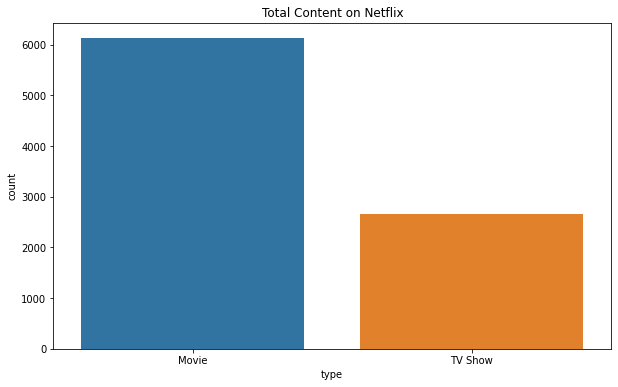

In [12]:
# Visualization - Distribution of Content Type
plt.figure(figsize=(10, 6))
freq = df['type'].value_counts()
sns.countplot(x=df['type'])
plt.title("Total Content on Netflix")
plt.show()

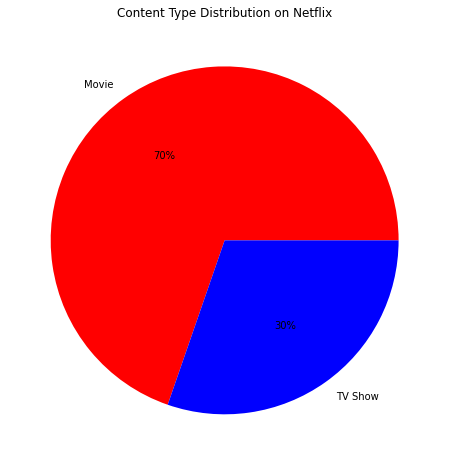

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(freq, labels=freq.index, autopct='%.0f%%', colors=['red', 'blue'])
plt.title("Content Type Distribution on Netflix")
plt.show()

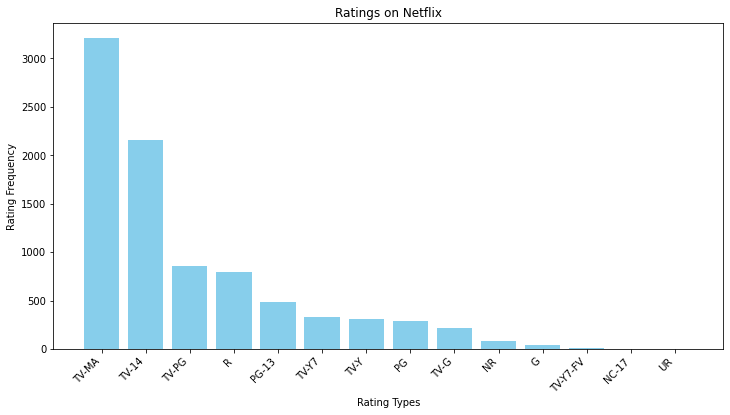

In [14]:
# Visualization - Rating Distribution
ratings = df['rating'].value_counts().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(ratings['rating'], ratings['count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.title("Ratings on Netflix")
plt.show()

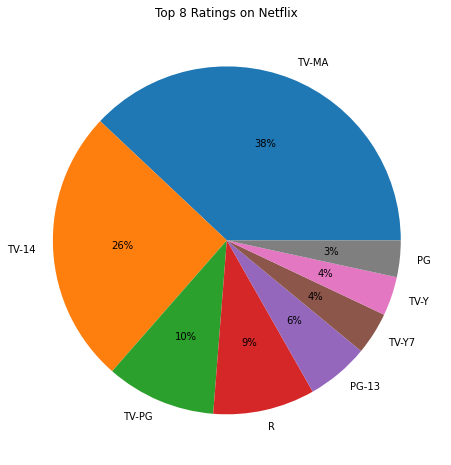

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%')
plt.title("Top 8 Ratings on Netflix")
plt.show()


In [16]:
# Visualization - Monthly and Yearly Releases
monthly_releases = df['month_added'].value_counts().sort_index()
yearly_releases = df['year_added'].value_counts().sort_index()


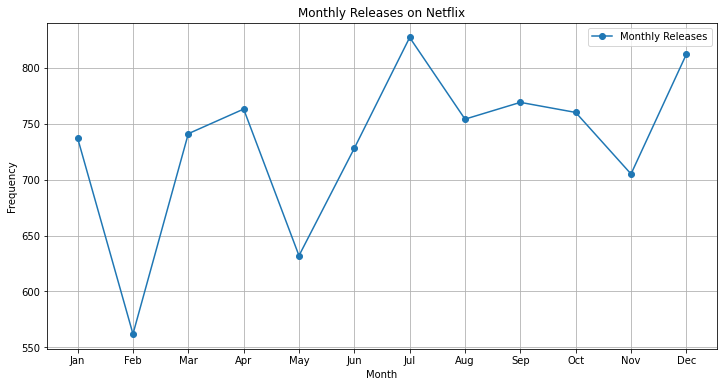

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_releases.index, monthly_releases.values, marker='o', label='Monthly Releases')
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Monthly Releases on Netflix")
plt.legend()
plt.grid()

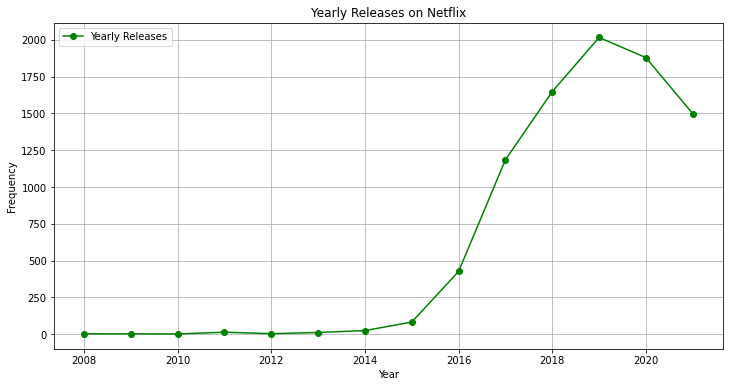

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_releases.index, yearly_releases.values, marker='o', label='Yearly Releases', color='green')
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Yearly Releases on Netflix")
plt.legend()
plt.grid()
plt.show()

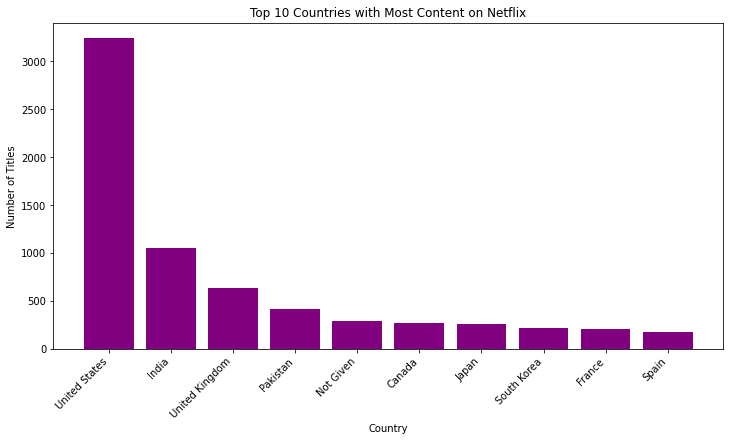

In [19]:
# Visualization - Top 10 Countries with Most Content
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_countries.index, top_countries.values, color='purple')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Top 10 Countries with Most Content on Netflix")
plt.show()


In [20]:
# Encode categorical variables
label_enc = LabelEncoder()
df['type'] = label_enc.fit_transform(df['type'])
df['rating'] = label_enc.fit_transform(df['rating'])


In [21]:
df = df[['type', 'year_added', 'month_added', 'rating']].dropna()

In [22]:
# Split data into training and testing sets
X = df.drop(columns=['type'])
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Hyperparameter tuning for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [25]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [26]:
# Train best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [27]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')
print('Classification Report:\n', report)


Accuracy: 0.7030716723549488

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.91      0.81      1238
           1       0.50      0.20      0.29       520

    accuracy                           0.70      1758
   macro avg       0.61      0.56      0.55      1758
weighted avg       0.66      0.70      0.66      1758

